In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/_c/6ryw2m_11jnf16xxb6k7rbj59hv3vh/T/ipykernel_47661/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [28]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
#Finding columns and datatype
from sqlalchemy import inspect,func
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [33]:
# Find the most recent date in the data set.
measurement_list = session.query(Measurement)
for measures in measurement_list:
    print(measures.date)

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

In [35]:
# Earliest Date # session.query(Measurement.date).order_by(Measurement.date).first()
# Find the most recent date in the data set (latest).
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
Result_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
str_date = list(np.ravel(Result_date))[0]
latest_date = dt.datetime.strptime(str_date,"%Y-%m-%d")
last_twelve_months = latest_date-dt.timedelta(days=366)

# # Perform a query to retrieve the data and precipitation scores
yearprecipt=session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).\
filter(Measurement.date>=last_twelve_months).all()

# # Save the query results as a Pandas DataFrame and set the index to the date column
# df_yearprecipt=pd.DataFrame(yearprecipt)
# df_yearprecipt.head()
# df_yearprecipt=df_yearprecipt.rename(columns={"prcp":"precipitation"})
# df_yearprecipt.head()

datetime.datetime(2016, 8, 22, 0, 0)

In [37]:
# Sort the dataframe by date
df_yearprecipt.sort_values(by=['date'],ascending = True)
df_yearprecipt = df_yearprecipt.dropna()
df_yearprecipt=df_yearprecipt.reset_index(drop=True)
df_yearprecipt.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79


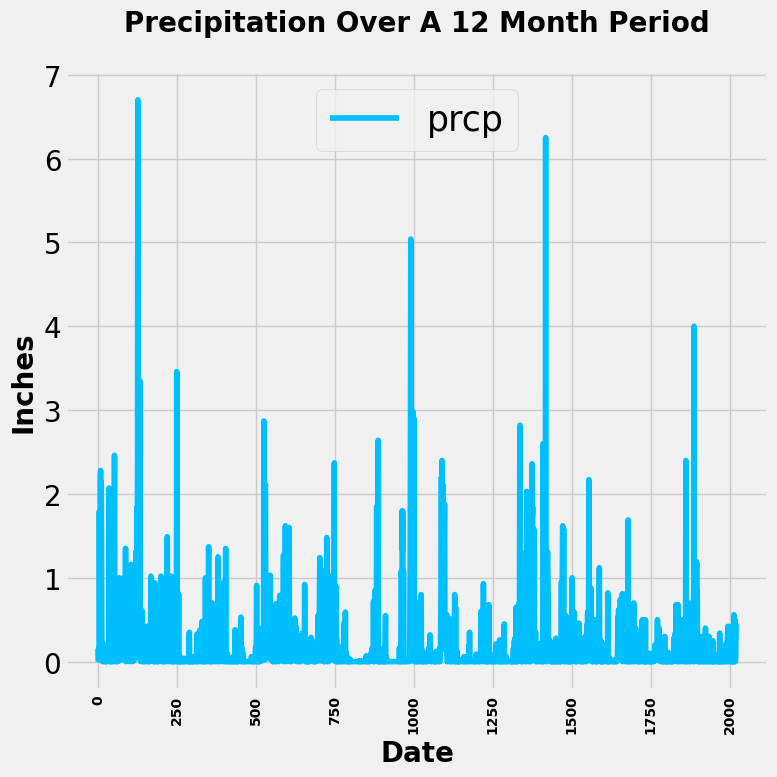

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
plotprcp_12 = df_yearprecipt.plot(figsize = (8, 8), color = 'deepskyblue', alpha = 1.0);
plotprcp_12.set_xlabel("Date",weight = "bold",size=20);
plotprcp_12.set_ylabel("Inches", weight="bold", size=20);
plotprcp_12.set_title("Precipitation Over A 12 Month Period\n", weight="bold", size=20);

# # Added after plot.legend()
plt.xticks(rotation=90, fontsize=10, weight="bold")
plt.yticks(fontsize=20)

# # size doesn't work for .legend() change to fontsize
plt.legend(loc="upper center", fontsize=25)

# # plot.grid()
plt.tight_layout()

plt.savefig("Precipitation12months.png")

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_yearprecipt.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
station_count=session.query(func.count(Station.id)).all()
station_count

[(9,)]

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_Measurment_join=session.query(Measurement.station,func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
station_Measurment_join

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_temp_station=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station==station_Measurment_join[0][0]).all()
most_temp_station


[(54.0, 85.0, 71.66378066378067)]

In [56]:
# identify the most station
station_Measurment_join[0][0]

'USC00519281'

In [62]:
tobs_overayear = session.query(Measurement.station, Station.name, Measurement.date, Measurement.tobs).\
filter(Measurement.station == Station.station).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").\
order_by(Measurement.date).all()

In [69]:
tobs_overayear_df = pd.DataFrame(tobs_overayear)
tobs_overayear_df = tobs_overayear_df.rename(columns={"station" : "station", "name" : "Name", "date" : "Date", "tobs" : "tobs"})
tobs_overayear_df.head()


,station,Name,Date,tobs
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0


<function matplotlib.pyplot.show(close=None, block=None)>

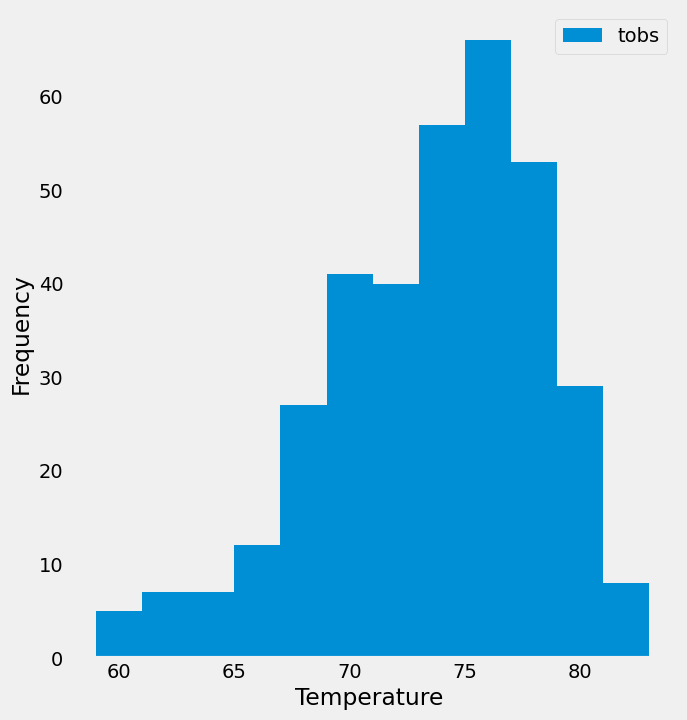

In [77]:
# hist = df_results['tobs'].hist(bins=12,figsize=(8,5), color='b', zorder=2)
tobs_overayear_df.plot.hist(bins=12, figsize=(7,8))
plt.grid()
plt.xlabel("Temperature ")
plt.savefig("StationTemps.png")
plt.show

# Close Session

In [16]:
# Close Session
session.close()